Import required packages

In [1]:
import cv2
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from utils import *


In [2]:
folders = ['bird', 'cat','airplane','automobile']
train_path_list = []
test_path_list = []
train_dir = 'C:/Users/zlai/Documents/repo/HomeworkTex/ML/hw/homework 1/data/train/'
test_dir = 'C:/Users/zlai/Documents/repo/HomeworkTex/ML/hw/homework 1/data/test/'
for folder in folders:
    l_train = train_dir + folder 
    l_test = test_dir + folder
    train_path_list.append(l_train)
    test_path_list.append(l_test)

In [3]:
x1_train, y1_train = load_data(train_path_list, feature='raw')
x1_test, y1_test = load_data(test_path_list, feature='raw')

In [7]:
def cos_sim(x1, x2):
    """
    Cosine similarity between two numpy arrays.
    """
    return np.inner(x1, x2)/(np.linalg.norm(x1)*np.linalg.norm(x2))    

In [8]:
def euclid_dist(x1, x2):
    """
    Euclidean distance between two numpy arrays.
    """
    return np.linalg.norm(x1 - x2)

In [18]:
def get_neighbors(x_train, 
                  y_train, 
                  x, 
                  k, 
                  distance=euclid_dist):
    """
    get_neighors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with  
    (index, dist, label)
    where 
    index    is the index from the training_set, 
    dist     is the distance between the test_instance and the 
             instance training_set[index]
    distance is a reference to a function used to calculate the 
             distances
    """
    distances = []
    for i in range(x_train.shape[0]):
        dist = distance(x, x_train[i])
        distances.append((x_train[i], dist, y_train[i]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

Function `vote` to decide which is the nearest neighbour

In [26]:
from collections import Counter
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

In [57]:
def knn_classfier(x_train, y_train, x_test, y_test, k , distance = euclid_dist):
    """
    
    """
    y_predict = np.zeros(y_test.shape)
    for i in np.arange(x_test.shape[0]):
        for j in np.arange(x_train.shape[0]):
            neighbors = get_neighbors(x_train, y_train, x_test[i], k, distance = distance)
            nearest = vote(neighbors)
        y_predict[i] = nearest
        
    return y_predict     

In [58]:
def knn_accuracy(y_test, y_predict):
    ind = (y_test == y_predict)
    return np.average(ind)

In [77]:
def knn(x_train, y_train, x_test, y_test, max_k):
    """
    
    """
    accuracy_ed = []
    for i in np.arange(1,max_k+1):
        y_predict = knn_classfier(x_train, y_train, x_test, y_test, i , distance = euclid_dist)
        acc = knn_accuracy(y_test, y_predict)
        accuracy_ed.append(acc)
    
    accuracy_cs = []
    for i in np.arange(1,max_k+1):
        y_predict = knn_classfier(x_train, y_train, x_test, y_test, i , distance = cos_sim)
        acc = knn_accuracy(y_test, y_predict)
        accuracy_cs.append(acc)
    
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
    ax1.plot(accuracy_ed, color='r')
    ax1.set_title('Accuracy (Higher Better)')
    ax1.set(xlabel='K', ylabel='Accuracy')
#     ax1.legend(['train', 'validation'], loc='upper right')

    ax2.plot(accuracy_cs, color='b')
    ax2.set_title('Accuracy (Higher Better)')
    ax2.set(xlabel='K', ylabel='Accuracy')
#     ax2.legend(['train', 'test'], loc='center right')
    
#     plt.plot(accuracy, color='r')
#     plt.title('Accuracy (Higher Better)')
#     plt.xlabel('K')
#     plt.ylabel('Accuracy')
#     plt.set_title('Accuracy (Higher Better)')
#     plt.set(xlabel='K', ylabel='Accuracy')
    
#     ax1.legend(['train', 'validation'], loc='upper right')

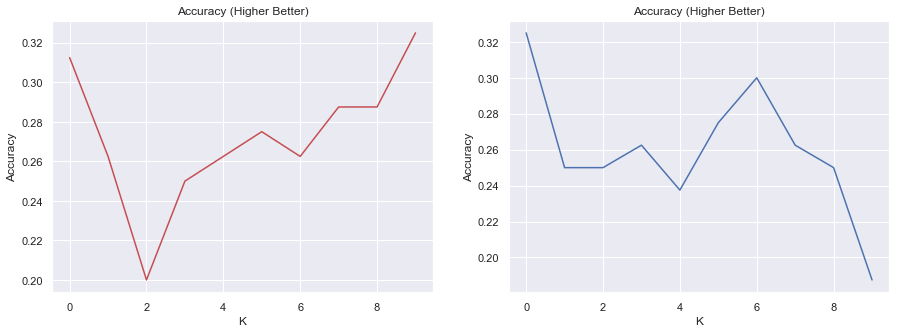

In [78]:
knn(x1_train, y1_train, x1_test, y1_test, 10)

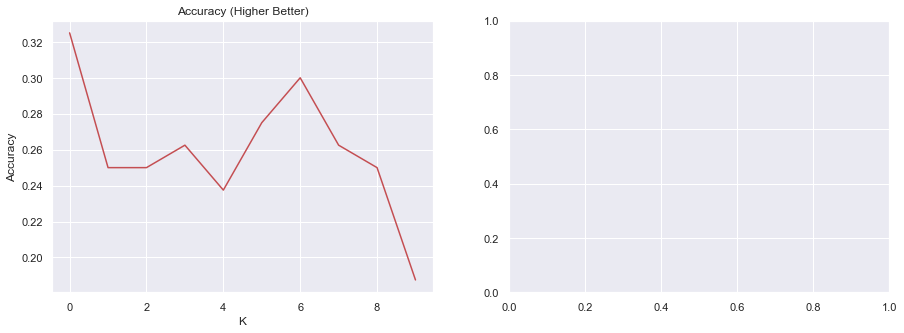

In [68]:
knn(x1_train, y1_train, x1_test, y1_test, 10, distance = cos_sim)